<a href="https://colab.research.google.com/github/1901010019/1901010019.github.io/blob/master/binary_classification_on_toy_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# visualization over a toy data set ( not from real world )

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles
n_samples=1000
X, y = make_circles(n_samples,noise=0.03, random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
len(y), len(X)

(1000, 1000)

In [5]:
# converting this into circles dataframe
circle = pd.DataFrame({'x0': X[:,0], 'x1': X[:,1], 'y': y})
circle

,x0,x1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


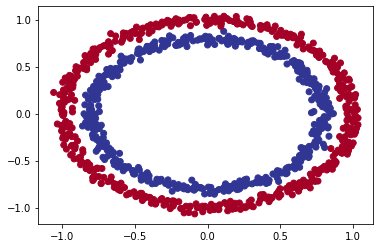

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

#modeling

In [8]:
# we are working with binary classification problem here
tf.random.set_seed(42)
model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(4, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])
history = model.fit(X,y, epochs=500)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/500
32/32 [==============================] - 3s 3ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [9]:
model.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.9960


[0.019344104453921318, 0.9959999918937683]

In [10]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


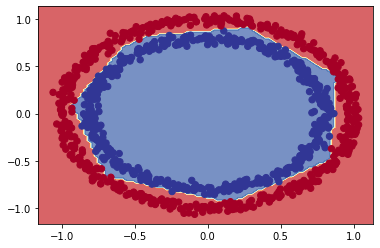

In [11]:
plot_decision_boundary(model, X, y)

In [12]:
model.predict(X)

array([[9.99927640e-01],
       [9.99982476e-01],
       [9.99709547e-01],
       [9.99999642e-01],
       [2.62305839e-04],
       [9.99989033e-01],
       [9.99956489e-01],
       [9.99609768e-01],
       [9.64947164e-01],
       [4.04661904e-09],
       [9.97198820e-01],
       [1.08751417e-04],
       [9.85642135e-01],
       [9.99880791e-01],
       [9.51366663e-01],
       [9.99777615e-01],
       [1.86522520e-04],
       [9.99924898e-01],
       [9.65417683e-01],
       [6.63928268e-03],
       [9.99783814e-01],
       [1.13251119e-07],
       [3.33139935e-04],
       [9.99980807e-01],
       [6.50289156e-09],
       [2.15267311e-04],
       [9.30193637e-05],
       [9.14557219e-01],
       [9.96533632e-01],
       [9.99507904e-01],
       [1.93538421e-04],
       [1.19394743e-08],
       [9.99997497e-01],
       [1.26103132e-05],
       [1.09532141e-06],
       [1.65034031e-09],
       [9.99981999e-01],
       [9.26501930e-01],
       [9.98847008e-01],
       [1.54522073e-03],


In [13]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [18]:
tensor = tf.cast(tf.range(-10,10), tf.float32)
tensor

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

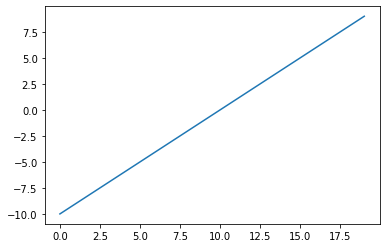

In [15]:
plt.plot(tensor)